# Regression Assignment

* You are required to use the below dataset on house prices to train a regression model:

https://www.kaggle.com/datasets/vikrishnan/boston-house-prices

#### Requirements:

- Divide dataset after importing into Train/Cross Validation/Test

- Test various hypothesis with different degrees and optimize your model and parameters using cross validation & test sets as explained in the lecture

- Apply Regularization and optimize the value of its parameter

##### Dataset Info:
* CRIM: per capita crime rate by town
* ZN: proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS: proportion of non-retail business acres per town
* CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
* NOX: nitric oxides concentration (parts per 10 million)
* RM: average number of rooms per dwelling
* AGE: proportion of owner-occupied units built prior to 1940
* DIS: weighted distances to five Boston employment centres
* RAD: index of accessibility to radial highways
* TAX: full-value property-tax rate per 10,000usd
* PTRATIO: pupil-teacher ratio by town
* B 1000(Bk - 0.63)^2" where Bk is the proportion of blacks by town
* LSTAT: % lower status of the population

##### Importing libraries

In [184]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_boston
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import scale
from sklearn.model_selection import cross_val_score

from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as geek

import warnings # supress warnings
warnings.filterwarnings('ignore')

###### Importing and preparing dataset

In [29]:
boston = load_boston()
data = pd.DataFrame(boston.data)

data.columns = boston.feature_names

####   'PRICE' is Median value of owner-occupied homes in $1000s

In [30]:
data['PRICE'] = boston.target 

#### Data set info & stats

In [39]:
data.describe()
#data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Finding Relations and trends between variables
* This will help us 'choose' which predictors to visualize with the target

In [6]:
# Correlation between features
corr = data.corr()

<AxesSubplot:>

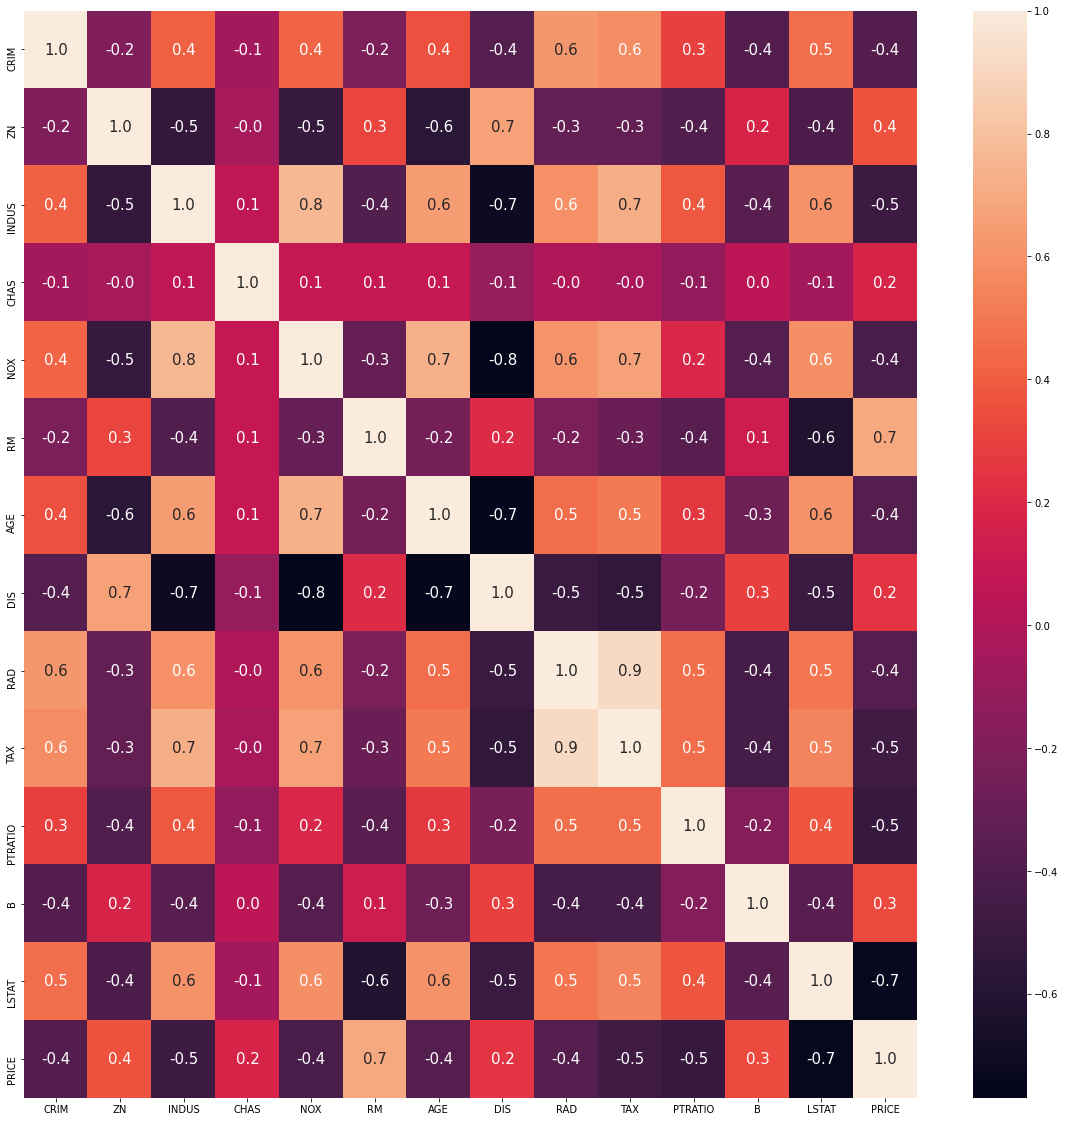

In [15]:
# Plotting the heatmap of correlation between features
# I was able to use sns.heatmap as the features are considered independent (of each other)
# The target value, PRICE, is dependent on the correlated value(s)

plt.figure(figsize=(20,20))
sns.heatmap(corr, fmt='.1f', annot=True, annot_kws={'size':15})

### Standardization and Scaling
* This will be done to the selected predictor and the specified target to better understand the relations through visualizations
    * And to prepare for splitting

In [58]:
# Filter only one predictor and PRICE
df = data.loc[:, ['RM', 'PRICE']]
df.head()

,RM,PRICE
0,6.575,24.0
1,6.421,21.6
2,7.185,34.7
3,6.998,33.4
4,7.147,36.2


In [59]:
## Rescaling the variables 
df_columns = df.columns
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

# renaming columns (since now its an np array)
df = pd.DataFrame(df)
df.columns = df_columns

<AxesSubplot:xlabel='RM', ylabel='PRICE'>

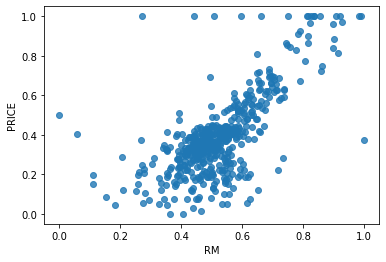

In [60]:
# Visualise room per dwelling and price relationship
sns.regplot(x="RM", y="PRICE", data=df.loc[:, ['RM', 'PRICE']], fit_reg=False)

In [62]:
# Splitting target variable (y) and independent predictor' variables (X) apart
X = df.drop(['PRICE'], axis = 1)
y = df['PRICE']

### Divide dataset after importing into Train/Cross Validation/Test

In [63]:
# Splitting to training and testing data

X_train, X_test, y_train, y_test = train_test_split(X,y, 
                                                    train_size = 0.7, random_state = 1)

## Linear Regression

In [51]:
# Create a Linear regressor
lr = LinearRegression()

'''
# Train the model using the training sets 
lr.fit(X_train, y_train)
'''

LinearRegression()

In [64]:
# fit multiple polynomial features
degrees = [1, 2, 3, 6, 10, 20]

# initialise y_train_pred and y_test_pred matrices to store the train and test predictions
# each row is a data point, each column a prediction using a polynomial of some degree
y_train_pred = np.zeros((len(X_train), len(degrees)))
y_test_pred = np.zeros((len(X_test), len(degrees)))

for i, degree in enumerate(degrees):
    
    # make pipeline: create features, then feed them to linear_reg model
    model = make_pipeline(PolynomialFeatures(degree), lr)
    model.fit(X_train, y_train)
    
    # predict on test and train data
    # store the predictions of each degree in the corresponding column
    y_train_pred[:, i] = model.predict(X_train)
    y_test_pred[:, i] = model.predict(X_test)
    #y_pred_d1 = y_train_pred[:,1]

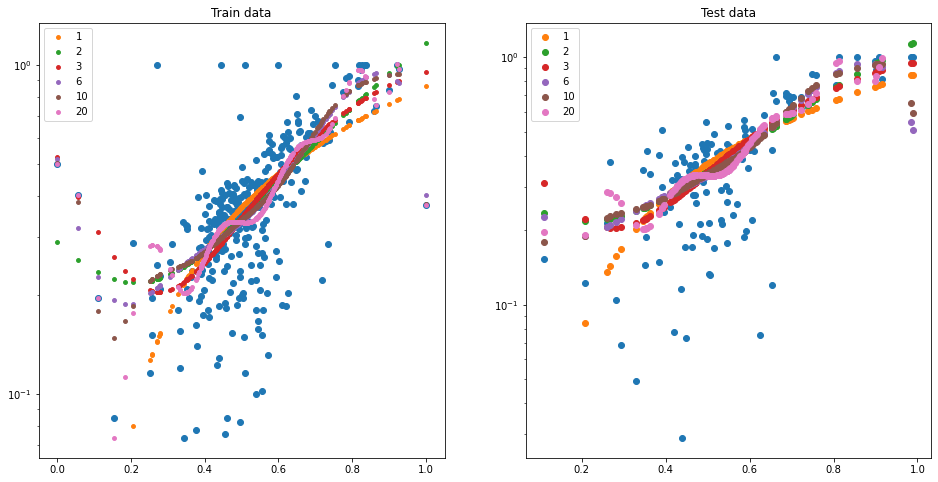

In [66]:
plt.figure(figsize=(16, 8))

# train data
plt.subplot(121)
plt.scatter(X_train, y_train)
plt.yscale('log')
plt.title("Train data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_train, y_train_pred[:, i], s=15, label=str(degree))
    plt.legend(loc='upper left')
    
# test data
plt.subplot(122)
plt.scatter(X_test, y_test)
plt.yscale('log')
plt.title("Test data")
for i, degree in enumerate(degrees):    
    plt.scatter(X_test, y_test_pred[:, i], label=str(degree))
    plt.legend(loc='upper left')

In [73]:
print("Using R-squared : \n")
for i, degree in enumerate(degrees):
    train_r2 = round(metrics.r2_score(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(metrics.r2_score(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {}: train score={}, test score={}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

Using R-squared : 

Polynomial degree 1: train score=0.42, test score=0.6
Polynomial degree 2: train score=0.49, test score=0.67
Polynomial degree 3: train score=0.51, test score=0.67
Polynomial degree 6: train score=0.55, test score=0.64
Polynomial degree 10: train score=0.55, test score=0.66
Polynomial degree 20: train score=0.58, test score=-17.28


In [75]:
print("Mean Absolute Error : \n")
for i, degree in enumerate(degrees):
    train_r2 = round(metrics.mean_absolute_error(y_train, y_train_pred[:, i]), 2)
    test_r2 = round(metrics.mean_absolute_error(y_test, y_test_pred[:, i]), 2)
    print("Polynomial degree {}: train score={}, test score={}".format(degree, 
                                                                         train_r2, 
                                                                         test_r2))

Mean Absolute Error : 

Polynomial degree 1: train score=0.1, test score=0.1
Polynomial degree 2: train score=0.1, test score=0.09
Polynomial degree 3: train score=0.09, test score=0.09
Polynomial degree 6: train score=0.09, test score=0.09
Polynomial degree 10: train score=0.09, test score=0.09
Polynomial degree 20: train score=0.09, test score=0.2


In [114]:
y_train_pred_df = pd.DataFrame(y_train_pred)
y_train_df = pd.DataFrame(y_train)
y_train_df.head()

,PRICE
13,0.342222
61,0.244444
377,0.184444
39,0.573333
365,0.500000


### Visualizing the actual prices and predicted values
* Differences between prices and predicted values
* Checking for residuals
* Checking Normality of errors

* Train 

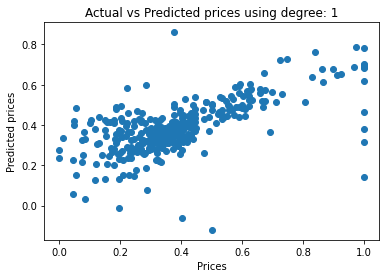

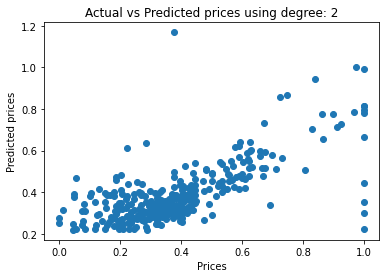

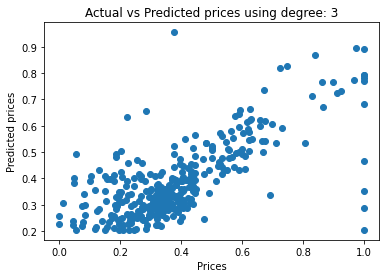

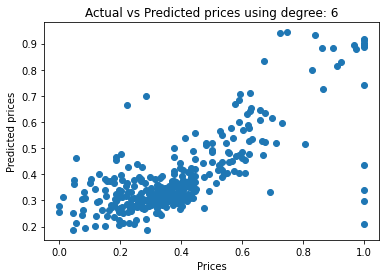

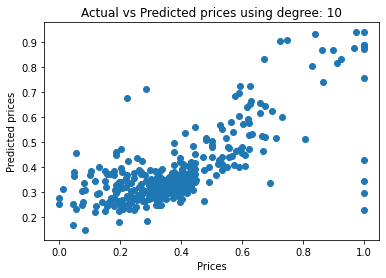

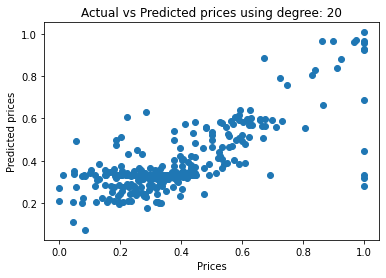

In [163]:
for deg in range(len(degrees)):
    plt.scatter(y_train_df, y_train_pred_df[deg])
    plt.xlabel("Prices")
    plt.ylabel("Predicted prices")
    plt.title("Actual vs Predicted prices using degree: {}".format(degrees[deg]))
    plt.show()

In [277]:
#Preparing train to calculate residuals
train_tmp = y_train_df.sort_index().reset_index().drop(['index'],axis=1)
residualss = pd.DataFrame(index=np.arange(354), columns=np.arange(6))

for k in range(6):
    residualss[k] = y_train_pred_df[k] - train_tmp['PRICE']

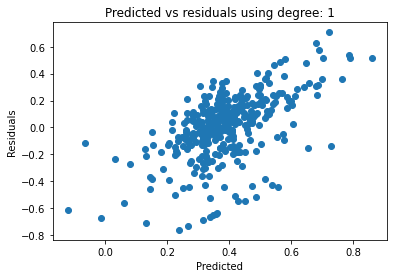

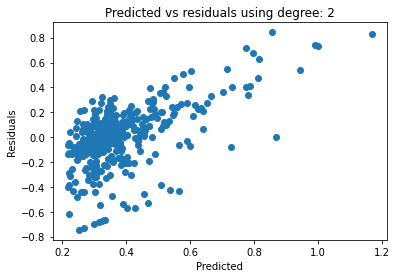

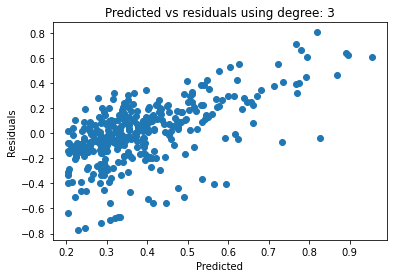

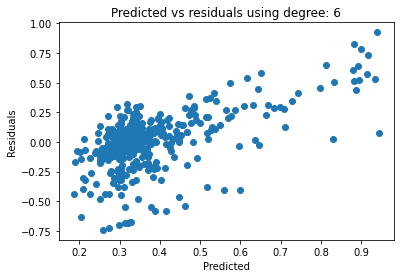

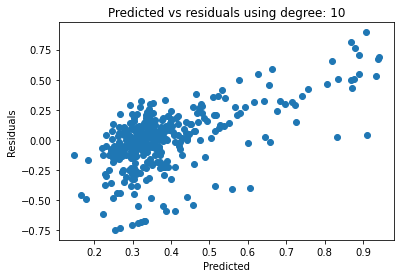

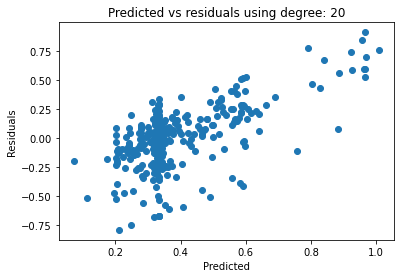

In [280]:
for deg in range(len(degrees)):
    plt.scatter(y_train_pred_df[deg], residualss[deg])
    plt.title("Predicted vs residuals using degree: {}".format(degrees[deg]))
    plt.xlabel("Predicted")
    plt.ylabel("Residuals")
    plt.show()

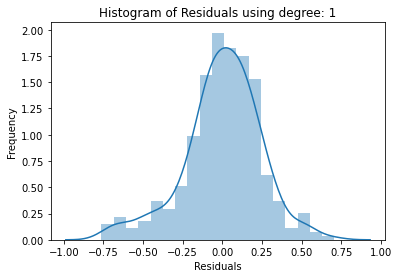

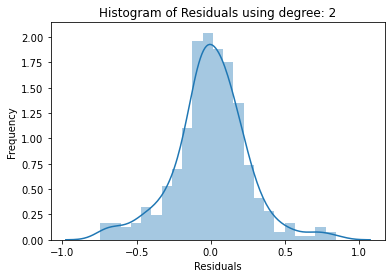

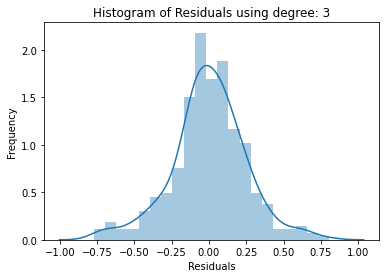

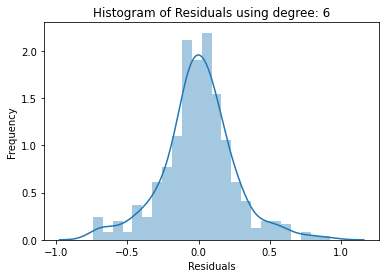

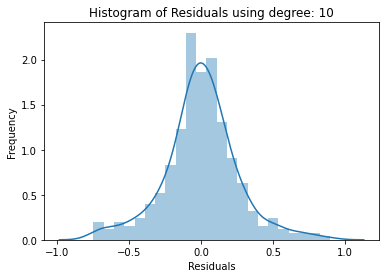

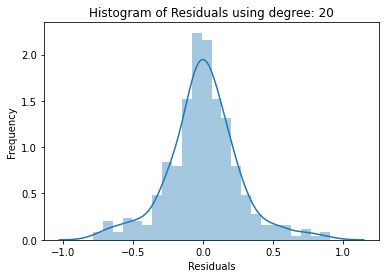

In [293]:
# Checking Normality of errors
for deg in range(len(degrees)):
    sns.distplot(residualss[deg])
    plt.title("Histogram of Residuals using degree: {}".format(degrees[deg]))
    plt.xlabel("Residuals")
    plt.ylabel("Frequency")
    plt.show()